
# Project: Investigate a Dataset - [TDMB-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

**The "TMDB-movies" dataset contains information about 10,000 movies collected from the Movie Database (TMDb) including the columns like :**

* **Cast:** includes famous actors participating in the movie.
* **Genres:** the classification categories of movies like action, drama, comedy, etc..
* **Production company:** the company which produced the movie.

*Notice that the above columns have multiple values need to be splitted and exploded for analysis.*

* **Revenue & budget:** are the financial terms related to funds gained and paid respectively

*Notice that when budget is subtracted from revenue, the result is called "profit". If the result is positive, that means that the movie earn and vice versa for lose.*

* **Revenue_adj & budget_adj:** are like the above description otherwise those are calculated after accounting for inflation over time from the movie's release year to 2010 in dollars.

* **Vote_count & Vote_average:** are used to record the total count of voting for certain movie and calculate the average rating by dividing the rating for certain movie by the total count of voting for the same movie.*

*Notice that the rating for a movie is ranged from (0 to 10) score.*

* **Runtime:** is the amount of time that a movie, performance, recording, etc., lasts from beginning to end.
* **Popularity:** indicates how much that title's page has been visited in the current week on IMDb in it's area of interest.


### Question(s) for Analysis are as follows:

**Question 1: Which genre in average is the most popular over all years?**

**Question 2: Which movie has the most average rating over all the years?**

**Question 3: Which movie has the most profitable one over all the years?**

**Question 4: What are the characteristics of the most runtime movies over all the years?**

**Question 5: What are the characteristics associated with the movies with highest profits over all the years?**

In [1]:
# First, all useful packages (pandas, numpy,matplotlib and seaborn) shall be called as follows:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [907 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\pandas
  copying pandas\conftest.py -> build\lib.win-amd64-cpython-39\pandas
  copying pandas\testing.py -> build\lib.win-amd64-cpython-39\pandas
  copying pandas\_typing.py -> build\lib.win-amd64-cpython-39\pandas
  copying pandas\_version.py -> build\lib.win-amd64-cpython-39\pandas
  copying pandas\__init__.py -> build\lib.win-amd64-cpython-39\pandas
  creating build\lib.win-amd64-cpython-39\pandas\api
  copying pandas\api\__init__.py -> build\lib.win-amd64-cpython-39\pandas\api
  creating build\lib.win-amd64-cpython-39\pandas\arrays
  copying pandas\arrays\__init__.py -> build\lib.win-amd64-cpython-39\pandas\arrays
  creating build\lib.win-amd64-cpython-39\pandas\compat
  copying pandas\comp


  Using cached pandas-0.25.0.tar.gz (12.6 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pandas
Failed to build pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.2
    Uninstalling pandas-1.5.2:
      Successfully uninstalled pandas-1.5.2
  Running setup.py install for pandas: started
  Running setup.py install for pandas: finished with status 'error'
  Rolling back uninstall of pandas
  Moving to c:\users\freecomp\python 3.9.13\lib\site-packages\pandas-1.5.2.dist-info\
   from C:\Users\FreeComp\Python 3.9.13\Lib\site-packages\~andas-1.5.2.dist-info
  Moving to c:\users\freecomp\python 3.9.13\lib\site-packages\pandas\
   from C:\Users\FreeComp\Python 3.9.13\Lib\site-packages\~andas


  creating build\lib.win-amd64-cpython-39\pandas\tests\io
  copying pandas\tests\io\conftest.py -> build\lib.win-amd64-cpython-39\pandas\tests\io
  copying pandas\tests\io\generate_legacy_storage_files.py -> build\lib.win-amd64-cpython-39\pandas\tests\io
  copying pandas\tests\io\test_clipboard.py -> build\lib.win-amd64-cpython-39\pandas\tests\io
  copying pandas\tests\io\test_common.py -> build\lib.win-amd64-cpython-39\pandas\tests\io
  copying pandas\tests\io\test_compression.py -> build\lib.win-amd64-cpython-39\pandas\tests\io
  copying pandas\tests\io\test_date_converters.py -> build\lib.win-amd64-cpython-39\pandas\tests\io
  copying pandas\tests\io\test_feather.py -> build\lib.win-amd64-cpython-39\pandas\tests\io
  copying pandas\tests\io\test_gbq.py -> build\lib.win-amd64-cpython-39\pandas\tests\io
  copying pandas\tests\io\test_gcs.py -> build\lib.win-amd64-cpython-39\pandas\tests\io
  copying pandas\tests\io\test_html.py -> build\lib.win-amd64-cpython-39\pandas\tests\io
  copyi

<a id='wrangling'></a>
## Data Wrangling

#### This section is divided in to two sub-sections as follows:

**1- General Properties:**

* In this part, loading the dataset file and print few lines of its dataframe in order to get a closer look at the dataset columns and try to extract the relationship among them.

**2- Data Cleaning:**

* In this part, all columns not related to posed questions, all duplicated rows, all rows with missing useful data will be eliminated and also if any outlier value is existed in any column to be replaced by another resonable value to make sure that all data within specified frame and can explored better.


### 1- General Properties :

**As mentioned before, dataset will be loaded and few lines of its dataframe will be printed to recognize in-general useful data concerning the columns data and understand if there is any relationships among them.**


In [3]:
# loading the "csv_file" which includes the dataframe of "TMDB-movies" dataset to be inspected.
df = pd.read_csv('tmdb-movies.csv')

# printing first five lines to recognize the dataset columns and their data inclusion.
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

After printing head lines of dataframe and screening their columns, it is found that there are some columns need to be trimmed from the dataframe because they aren't related to the posed questions in the introductory part any more and keep only the useful/related columns.
 
**Note:**  This step will be addressed in the below "Data Cleaning" part.

Now, it is time to print the information of dataframe to recognize the datatypes, shape(no. of columns and rows) and also find if there are missing data for each column.

In [4]:
# The below code will print all useful data mentioned bfore about  the datatypes, shape(no. of columns and rows) and
# also find if there are missing data for each column:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### The following is noticed:

* there are 21 columns and 10866 rows in the dataframe which many non-related columns will eliminated in the data cleaning part.
* The datatypes of related columns to our posed questions have no any problem, so that, there isn't any need to address them in the data cleaning part.
* There are many missing data in related columns like 'genres' which rows will be addressed and eliminated in the data cleaning part.

**Now, it is time to print the available statistics of our dataframe to recognize them and find if any problems with them.**

In [5]:
# Printing the dataframe statistics
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

#### The following is noticed:

* There are non-resonable values in both budget and revenue columns which about 50% of their values are represnted by "0" and that is not accepted in analysis.

**Consequently, the dataframe will be modified in data cleaning part to enable analysis only for all movie-rows which include budget and revenue values bigger than zero.**



### Data Cleaning

#### The cleaning process will be excuted within the following steps:

* Eliminating non-related columns.
* Filtering the dataframe to include all values of budget and revenue columns that are bigger than zero.
* Adding additional useful columns ("profit" & "ratio_profit_to_budget") to ease analysis and connect dataframe parameters to profit and ratio of profit to budget parameters as dependent variables.
* Limitation for dataframe budget and revenue values. 
* Dropping all rows that have (Nan) or missing values wiyhin the related column "genres".
* Check the duplicated rows and removing them if any.
* Finding out if any outlier values within the dataframe columns and replacing them by other meaningful values.
* Printing the dataframe after excuting all previous cleaning steps and recognize its shape, datatypes, etc...
 

#### Eliminating non-related columns

*There are many non-related columns like (id, imdb_id, homepage, cast, etc..) shall be eliminated as per the below code to avoid disturb during analysis.*

**Be noticed that we will use the actual values of budget & revenue columns only and remove their values after accounting inflation in columns ("budget_adj" & "revenue_adj") to simplify the analysis and instead, we will add  new columns of profit and profit ratio to corresponding budget later.**

In [6]:
# drop all non-related columns
df.drop(columns = ['id','imdb_id','tagline','homepage','cast','production_companies', 'keywords','overview','release_date','director','budget_adj','revenue_adj'],axis=1, inplace=True)

In [7]:
# print the dataframe information to check that the dropped columns are already eliminated
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   runtime         10866 non-null  int64  
 5   genres          10843 non-null  object 
 6   vote_count      10866 non-null  int64  
 7   vote_average    10866 non-null  float64
 8   release_year    10866 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 764.1+ KB


*The dataframe is minimized to only 9 columns to get more focus on them in the coming analysis process*

#### Filtering the dataframe to include all budget & revenue values bigger than zero:

* This step is to get resonable and meaningful analysis

In [8]:
# Filter dataframe to get all revenue & budget columns bigger than zero.
df = df.query('revenue > 0')
df = df.query('budget > 0')

In [9]:
# print statististics computations to insure there is no zero values of budget and revenue columns any more
df.describe()

popularity        budget       revenue      runtime   vote_count  \
count  3855.000000  3.855000e+03  3.855000e+03  3855.000000  3855.000000   
mean      1.191400  3.720183e+07  1.076589e+08   109.215824   527.611933   
std       1.475002  4.220291e+07  1.765248e+08    19.922166   879.868374   
min       0.001117  1.000000e+00  2.000000e+00    15.000000    10.000000   
25%       0.462448  1.000000e+07  1.357645e+07    95.000000    71.000000   
50%       0.797298  2.400000e+07  4.479322e+07   106.000000   204.000000   
75%       1.368245  5.000000e+07  1.241530e+08   119.000000   580.000000   
max      32.985763  4.250000e+08  2.781506e+09   338.000000  9767.000000   

       vote_average  release_year  
count    3855.00000   3855.000000  
mean        6.16786   2001.263294  
std         0.79504     11.281989  
min         2.20000   1960.000000  
25%         5.70000   1995.000000  
50%         6.20000   2004.000000  
75%         6.70000   2010.000000  
max         8.40000   2015.000000

#### Adding additional useful columns to get analysis more ease facilities

* Adding "profit" column that is calculated by subtracting budget column from the corresponding revenue column per each row of dataframe.
* Adding "ratio_profit_to_budget" column that is calculated by diving the new added profit column by the corresponding budget column per each row of dataframe

**Note**: The below function "Using df.insert()" is referenced to the site (Data Independent) by searching on google using keywords "adding new columns to dataframe python" through "https://dataindependent.com/pandas/add-column-to-dataframe-pandas/"

In [10]:
# Adding profit column as described above
df.insert(loc=3, column='profit', value=df.revenue-df.budget)

In [11]:
# Adding profit column as described above
df.insert(loc=4, column='ratio_profit_to_budget', value=(df.profit/df.budget))

*Now, let's print five head lines of dataframe after inserting the new columns to check the addition.*

In [12]:
df.head()

popularity     budget     revenue      profit  ratio_profit_to_budget  \
0   32.985763  150000000  1513528810  1363528810                9.090192   
1   28.419936  150000000   378436354   228436354                1.522909   
2   13.112507  110000000   295238201   185238201                1.683984   
3   11.173104  200000000  2068178225  1868178225                9.340891   
4    9.335014  190000000  1506249360  1316249360                6.927628   

                 original_title  runtime  \
0                Jurassic World      124   
1            Mad Max: Fury Road      120   
2                     Insurgent      119   
3  Star Wars: The Force Awakens      136   
4                     Furious 7      137   

                                      genres  vote_count  vote_average  \
0  Action|Adventure|Science Fiction|Thriller        5562           6.5   
1  Action|Adventure|Science Fiction|Thriller        6185           7.1   
2         Adventure|Science Fiction|Thriller        2480           6.3   
3   Action|Adventure|Science Fiction|Fantasy        5292           7.5   
4                      Action|Crime|Thriller        2947           7.3   

   release_year  
0          2015  
1          2015  
2          2015  
3          2015  
4          2015

#### Limitation for dataframe budget and revenue values. 

**First, let's describe all statistics associated with the dataframe as follows :**

In [13]:
df.describe()

popularity        budget       revenue        profit  \
count  3855.000000  3.855000e+03  3.855000e+03  3.855000e+03   
mean      1.191400  3.720183e+07  1.076589e+08  7.045710e+07   
std       1.475002  4.220291e+07  1.765248e+08  1.506085e+08   
min       0.001117  1.000000e+00  2.000000e+00 -4.139124e+08   
25%       0.462448  1.000000e+07  1.357645e+07 -1.325776e+06   
50%       0.797298  2.400000e+07  4.479322e+07  2.000718e+07   
75%       1.368245  5.000000e+07  1.241530e+08  8.168326e+07   
max      32.985763  4.250000e+08  2.781506e+09  2.544506e+09   

       ratio_profit_to_budget      runtime   vote_count  vote_average  \
count            3.855000e+03  3855.000000  3855.000000    3855.00000   
mean             2.969639e+02   109.215824   527.611933       6.16786   
std              1.644042e+04    19.922166   879.868374       0.79504   
min             -9.999998e-01    15.000000    10.000000       2.20000   
25%             -1.240715e-01    95.000000    71.000000       5.70000   
50%              1.119489e+00   106.000000   204.000000       6.20000   
75%              3.210158e+00   119.000000   580.000000       6.70000   
max              1.018618e+06   338.000000  9767.000000       8.40000   

       release_year  
count   3855.000000  
mean    2001.263294  
std       11.281989  
min     1960.000000  
25%     1995.000000  
50%     2004.000000  
75%     2010.000000  
max     2015.000000

**The following is noticed after reviewing the statistics of dataframe :**

1- The minimum values of budget and revenue still are very low and need to be modified

2- It is noticed that the "ratio of profit to budget" column has non-reasonable maximum value with over than 1 M.

**So that, the minimum values of both budget and revenue shall be limited to certain value**

Let's first explore the budget and revenue values for earlier 20 release_year in order from 1960 to 1977 because it is normally that the earlier years have the minimum budget and revenue funds values.

**Note**

*The sort method is referenced to stack overflow site after searching on google by keywords "sorting after group by pandas"* through the link "https://stackoverflow.com/questions/27842613/pandas-groupby-then-sort-within-groups"

In [14]:
# first using query, sort_value and groupby methods to disply the minimum budget values for movies from 1960 to 1970
df.query('release_year <= 1970').sort_values('release_year', ascending=True).groupby('release_year').budget.min()

release_year
1960     806948
1961     200000
1962     500000
1963    2500000
1964     500000
1965    5600000
1966    3000000
1967    2000000
1968     950000
1969    3600000
1970    2200000
Name: budget, dtype: int64

In [57]:
# first using query, sort_value and groupby methods to disply the minimum revenue values for movies from 1960 to 1970
df.query('release_year <= 1970').sort_values('release_year', ascending=True).groupby('release_year').revenue.min()

release_year
1960     4905000
1961     2000000
1962     2500000
1963     5000000
1964     1000549
1965    12000000
1966     6000000
1967     2000000
1968      814666
1969      638641
1970      900000
Name: revenue, dtype: int64

**It is noticed that the minimum budget values of movies in the period (1960-1970) is in a range (500 k to 3.6 M) dollars and also the minimum  revenue values of movies within the same period is in a range (638.6 k to 12 M) dollars.**

 **so, we will use clear filteration with meaningful values by refilter the budget and revenue columns with values more than 1 M$ and then we shall review the "ratio of profit to budget"**

In [15]:
# Re-filter dataframe to get all revenue & budget columns bigger than the (25%) of maximum existing values.
df = df.query('revenue > 1000000')
df = df.query('budget > 1000000')

In [59]:
# Re-check the statistics again
df.describe()

popularity        budget       revenue        profit  \
count  3492.000000  3.492000e+03  3.492000e+03  3.492000e+03   
mean      1.264270  4.048578e+07  1.181444e+08  7.765865e+07   
std       1.526898  4.291088e+07  1.821533e+08  1.562689e+08   
min       0.010335  1.100000e+06  1.007962e+06 -4.139124e+08   
25%       0.501093  1.200000e+07  1.928750e+07  2.660520e+05   
50%       0.876508  2.500000e+07  5.450273e+07  2.565411e+07   
75%       1.466110  5.262500e+07  1.394656e+08  9.323776e+07   
max      32.985763  4.250000e+08  2.781506e+09  2.544506e+09   

       ratio_profit_to_budget      runtime   vote_count  vote_average  \
count             3492.000000  3492.000000  3492.000000   3492.000000   
mean                 2.905087   110.176690   571.575315      6.185338   
std                  6.773505    19.637943   911.926059      0.785446   
min                 -0.982902    26.000000    10.000000      3.300000   
25%                  0.020939    96.000000    84.000000      5.700000   
50%                  1.206225   106.000000   236.000000      6.200000   
75%                  3.165400   120.000000   637.000000      6.700000   
max                105.577406   248.000000  9767.000000      8.400000   

       release_year  
count   3492.000000  
mean    2001.176690  
std       11.210979  
min     1960.000000  
25%     1995.000000  
50%     2004.000000  
75%     2010.000000  
max     2015.000000

**Now, all statistics give meaningful values with minimum budget and revenue values of 1M dollars that result in the maximum value of "ratio_profit_to_budget" is (105.58) which is more acceptable than 1M before filtering the dataframe starting from 1M  for the budget and revenue values**

*So, let's go to the next cleaning steps*

#### Dropping any missing data (Nan-values) contained in dataframe columns:

From the above printed information of dataframe, it is noticed that only 'genres' column has null values.

So, let's drop them

In [16]:
# Dropping null values included in genres column:
df.dropna(axis = 0, inplace = True, subset = ['genres'])
df.shape

(3492, 11)

#### Check for duplicated rows and removing them if any

In [17]:
# Check how many duplicated rows are exisited.
df.duplicated().sum()

0

*There is no duplicated rows. So, let's go to the next step*

#### Finding out if any outlier values within the dataframe columns and replacing them by other meaningful values.

Let's first visualize scatter matrix for all dataframe parameters with each other to capture if any abnormal outliers in the plots 

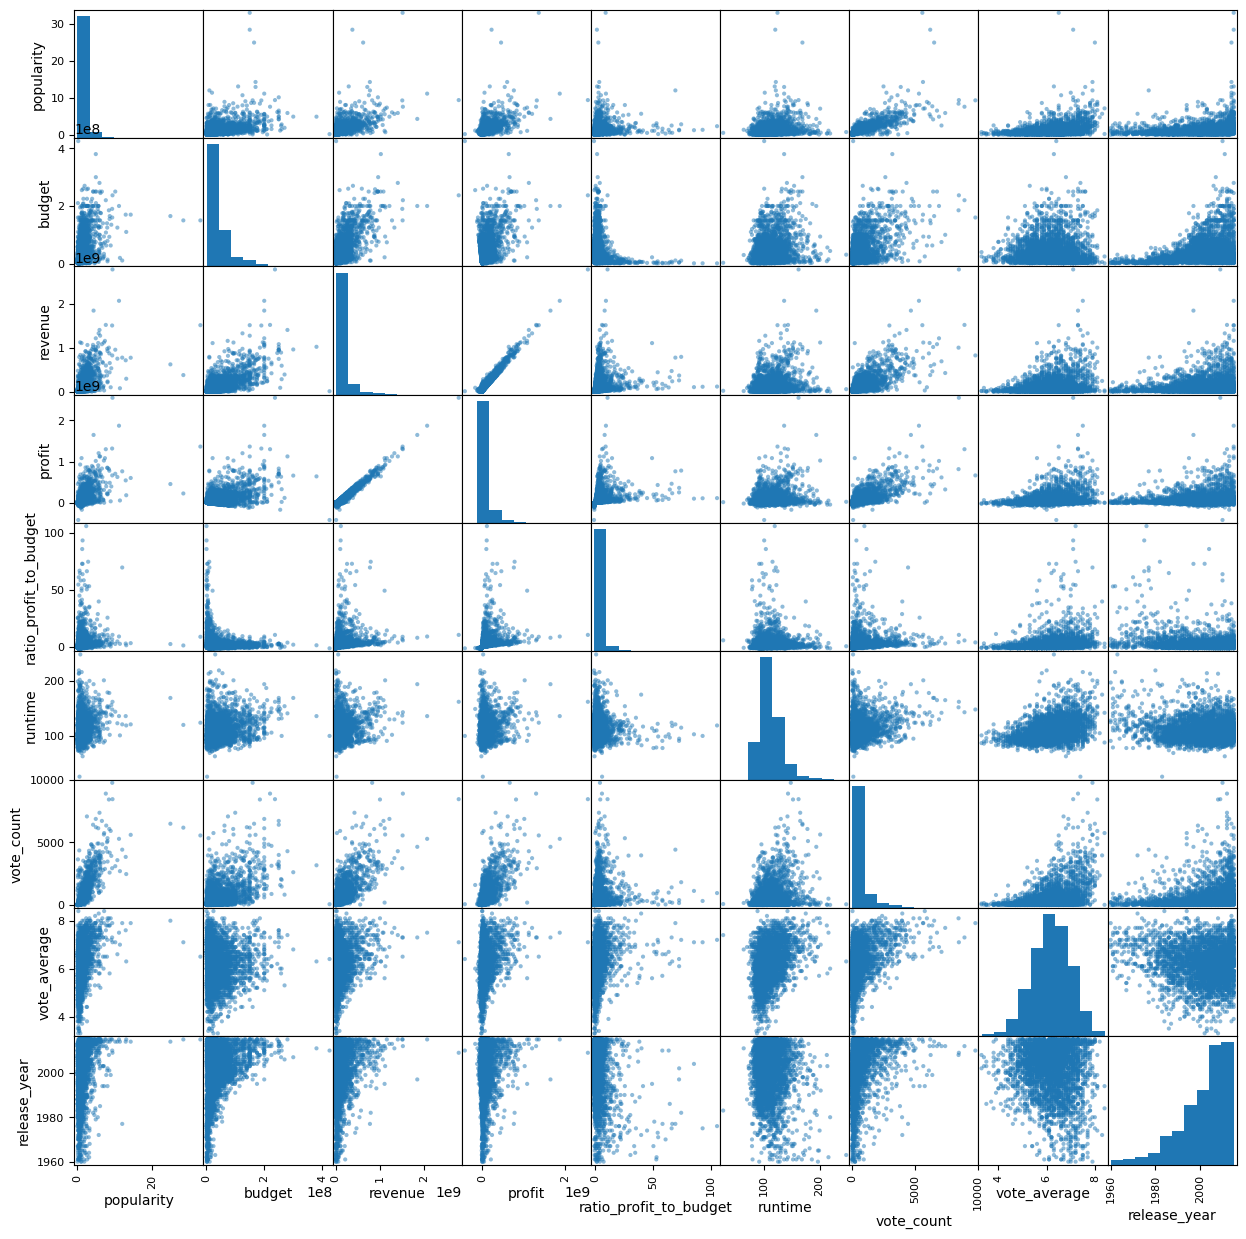

In [18]:
# plotting scatter matrix plots for all parameters of dataframe with each other.
pd.plotting.scatter_matrix(df,figsize=(15,15));

It is noticed that ther is no outlier values within different scatter plots. So, let's double that check by printing statistics of dataframe after modification

In [19]:
# printing the statistics to ensure no outliers within the dataframe fields
df.describe()

popularity        budget       revenue        profit  \
count  3492.000000  3.492000e+03  3.492000e+03  3.492000e+03   
mean      1.264270  4.048578e+07  1.181444e+08  7.765865e+07   
std       1.526898  4.291088e+07  1.821533e+08  1.562689e+08   
min       0.010335  1.100000e+06  1.007962e+06 -4.139124e+08   
25%       0.501093  1.200000e+07  1.928750e+07  2.660520e+05   
50%       0.876508  2.500000e+07  5.450273e+07  2.565411e+07   
75%       1.466110  5.262500e+07  1.394656e+08  9.323776e+07   
max      32.985763  4.250000e+08  2.781506e+09  2.544506e+09   

       ratio_profit_to_budget      runtime   vote_count  vote_average  \
count             3492.000000  3492.000000  3492.000000   3492.000000   
mean                 2.905087   110.176690   571.575315      6.185338   
std                  6.773505    19.637943   911.926059      0.785446   
min                 -0.982902    26.000000    10.000000      3.300000   
25%                  0.020939    96.000000    84.000000      5.700000   
50%                  1.206225   106.000000   236.000000      6.200000   
75%                  3.165400   120.000000   637.000000      6.700000   
max                105.577406   248.000000  9767.000000      8.400000   

       release_year  
count   3492.000000  
mean    2001.176690  
std       11.210979  
min     1960.000000  
25%     1995.000000  
50%     2004.000000  
75%     2010.000000  
max     2015.000000

After observing the scatter plot matrix and screening the statistics of the dataframe, there is no outliers within its columns and now the dataframe is cleaned and ready to be explored within the exploratory data analysis section

#### Printing the dataframe after excuting all previous cleaning steps and recognize its shape, datatypes, etc...

In [20]:
# Printing the five head lines of cleaned dataframe
df.head()

popularity     budget     revenue      profit  ratio_profit_to_budget  \
0   32.985763  150000000  1513528810  1363528810                9.090192   
1   28.419936  150000000   378436354   228436354                1.522909   
2   13.112507  110000000   295238201   185238201                1.683984   
3   11.173104  200000000  2068178225  1868178225                9.340891   
4    9.335014  190000000  1506249360  1316249360                6.927628   

                 original_title  runtime  \
0                Jurassic World      124   
1            Mad Max: Fury Road      120   
2                     Insurgent      119   
3  Star Wars: The Force Awakens      136   
4                     Furious 7      137   

                                      genres  vote_count  vote_average  \
0  Action|Adventure|Science Fiction|Thriller        5562           6.5   
1  Action|Adventure|Science Fiction|Thriller        6185           7.1   
2         Adventure|Science Fiction|Thriller        2480           6.3   
3   Action|Adventure|Science Fiction|Fantasy        5292           7.5   
4                      Action|Crime|Thriller        2947           7.3   

   release_year  
0          2015  
1          2015  
2          2015  
3          2015  
4          2015

In [21]:
# printing dataframe information to recognize its shape, datatypes, non-null values counts and etc..
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3492 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   popularity              3492 non-null   float64
 1   budget                  3492 non-null   int64  
 2   revenue                 3492 non-null   int64  
 3   profit                  3492 non-null   int64  
 4   ratio_profit_to_budget  3492 non-null   float64
 5   original_title          3492 non-null   object 
 6   runtime                 3492 non-null   int64  
 7   genres                  3492 non-null   object 
 8   vote_count              3492 non-null   int64  
 9   vote_average            3492 non-null   float64
 10  release_year            3492 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 327.4+ KB


**The cleaned dataframe includes 11 columns and 3492 rows representing all useful dataframe needed to answer, explore and draw required conclusions for all posed questions in the introductory part.**

<a id='eda'></a>
## Exploratory Data Analysis

In this section, dataframe is explored by computing statistics and performing visualizations needed to answer and draw the required conclusions for the posed questions in the introductory section.

### Question 1: Which genre in average is the most popular over all years?

To obtain the most average popular genre in the movies over all the years, genres column (which have multiple values per one entry) shall be exploded to get only one genre per each entry of the column.

**Note:**  The "explode" function is referenced to pandas’ documentation which can be found through this address (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html#)

In [22]:
# First making a copy of the dataframe (df) 
df_genres = df.copy()

# Splitting multiple values of one entry using split values separated by the existed delimeter "|"
df_genres.genres=df_genres.genres.str.split('|')

In [23]:
# Then exploding the splitted values of that column to be contained in multiple rows equal to the number of multiple values
# per each entry.
df_genres=df_genres.explode('genres')

# Printing five head lines of dataframe
df_genres.head()

popularity     budget     revenue      profit  ratio_profit_to_budget  \
0   32.985763  150000000  1513528810  1363528810                9.090192   
0   32.985763  150000000  1513528810  1363528810                9.090192   
0   32.985763  150000000  1513528810  1363528810                9.090192   
0   32.985763  150000000  1513528810  1363528810                9.090192   
1   28.419936  150000000   378436354   228436354                1.522909   

       original_title  runtime           genres  vote_count  vote_average  \
0      Jurassic World      124           Action        5562           6.5   
0      Jurassic World      124        Adventure        5562           6.5   
0      Jurassic World      124  Science Fiction        5562           6.5   
0      Jurassic World      124         Thriller        5562           6.5   
1  Mad Max: Fury Road      120           Action        6185           7.1   

   release_year  
0          2015  
0          2015  
0          2015  
0          2015  
1          2015

*It is noticed that the indexes of datafram is repetitive and shall be reset in normal order stepped by one.*

In [24]:
# First, using numpy package, creat a list starting from zero and end at the number of last row of dataframe
idx = np.arange(0,df_genres.shape[0])

# Then, set the indexes of the dataframe to be as contained in the "idx" list.
df_genres.set_index(idx, inplace=True)

# Check the indexes of dataframe
df_genres.head()

popularity     budget     revenue      profit  ratio_profit_to_budget  \
0   32.985763  150000000  1513528810  1363528810                9.090192   
1   32.985763  150000000  1513528810  1363528810                9.090192   
2   32.985763  150000000  1513528810  1363528810                9.090192   
3   32.985763  150000000  1513528810  1363528810                9.090192   
4   28.419936  150000000   378436354   228436354                1.522909   

       original_title  runtime           genres  vote_count  vote_average  \
0      Jurassic World      124           Action        5562           6.5   
1      Jurassic World      124        Adventure        5562           6.5   
2      Jurassic World      124  Science Fiction        5562           6.5   
3      Jurassic World      124         Thriller        5562           6.5   
4  Mad Max: Fury Road      120           Action        6185           7.1   

   release_year  
0          2015  
1          2015  
2          2015  
3          2015  
4          2015

**To answer the question of popular genre. That can performed by the following:**

* grouping the exploded dataframe by genres column based on average values of popularity per each genre for all rows in the dataframe.
* Using sort_value method to get the descending order of popular genres in average in movies over all the years.

In [25]:
# calculating the popular genres in average with a descending order
popular_genres = df_genres.groupby(['genres']).popularity.mean().sort_values(ascending=False)

# print the said list of popular genres
popular_genres

genres
Science Fiction    1.986158
Adventure          1.906776
Fantasy            1.826226
Animation          1.755785
Action             1.618029
Family             1.480692
Thriller           1.328667
War                1.291150
Mystery            1.200517
Western            1.179167
Crime              1.162543
Drama              1.069618
Comedy             1.063417
Romance            1.009870
History            0.995512
Music              0.928575
Horror             0.922362
Documentary        0.376220
TV Movie           0.273628
Foreign            0.194326
Name: popularity, dtype: float64

**Visualization of the most popular genres used in movies over all the years can be perfomed using bar chart as shown below**

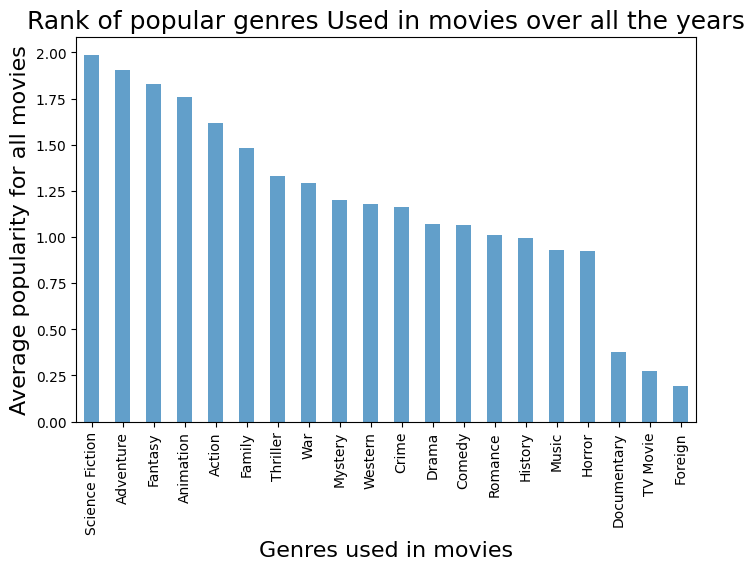

In [26]:
# using matplotlib package, plot the popular genres in bar chart
popular_genres.plot(kind='bar',figsize=(8,5), alpha=0.7)

# Inserting the main plot title and titles of x and y labels
plt.title('Rank of popular genres Used in movies over all the years', fontsize=18)
plt.xlabel('Genres used in movies',fontsize=16)
plt.ylabel('Average popularity for all movies',fontsize=16);


**It is obiviously that the science fiction is the most popular genre used in movies over all the years.**

**Also, the count of genres used in movies shall be inspected to get the most frequent used genre in movies over all the years**

In [27]:
# First, calculating the total counts of using genres in movies over all the years and sorting them in a descending order.
genres_count = df_genres.genres.value_counts().sort_values(ascending=False)

# Printing the said list 
genres_count

Drama              1556
Comedy             1242
Thriller           1094
Action             1033
Adventure           724
Crime               607
Romance             603
Science Fiction     479
Family              414
Horror              382
Fantasy             373
Mystery             315
Animation           194
Music               126
History             124
War                 113
Western              49
Documentary          19
Foreign              10
TV Movie              1
Name: genres, dtype: int64

**After that, the total counts of all genres shall be calculated and then using it to calculate proportion of genre count to the total count of genres over all the years.**

In [28]:
# calculating the total count of genres used in movies over all the years
total_count = df_genres.genres.value_counts().sum()
total_count

9458

In [29]:
# Calculate the genre count proportion to the total count of used genres
genre_count_proportion = (genres_count / total_count)*100
genre_count_proportion

Drama              16.451681
Comedy             13.131740
Thriller           11.566927
Action             10.921971
Adventure           7.654895
Crime               6.417847
Romance             6.375555
Science Fiction     5.064496
Family              4.377247
Horror              4.038909
Fantasy             3.943751
Mystery             3.330514
Animation           2.051174
Music               1.332206
History             1.311059
War                 1.194756
Western             0.518080
Documentary         0.200888
Foreign             0.105731
TV Movie            0.010573
Name: genres, dtype: float64

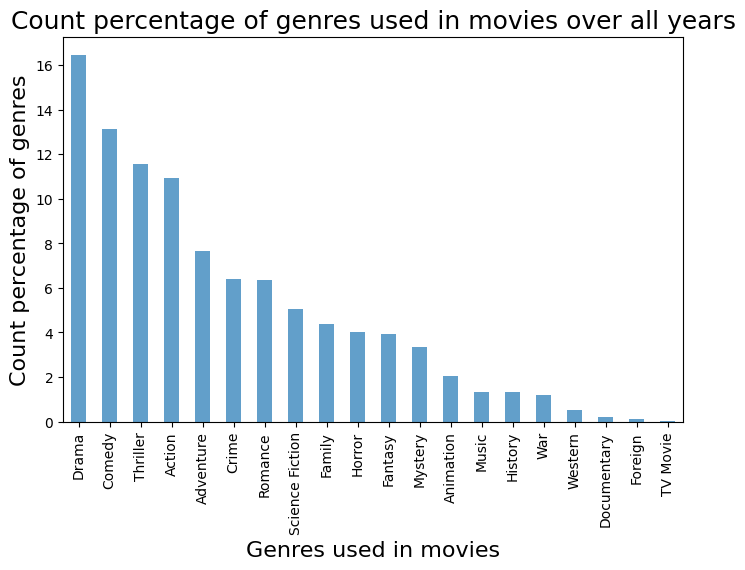

In [30]:
genre_count_proportion.plot(kind='bar',alpha =0.7,figsize=(8,5))
plt.title('Count percentage of genres used in movies over all years',fontsize=18)
plt.xlabel('Genres used in movies',fontsize=16)
plt.ylabel('Count percentage of genres',fontsize=16);

**Now, the most used genre in movies over all the years is "Drama" which has a moderate popularity over all the movies.**

**While the science fiction genre, which is the most popular genre over all the movies, has already a moderate usage count over all the years.**

### Question 2: Which movie has the most average rating over all the years?

**The average raing of movies over all the years can be extracted and then sorted in descending order as follows**

In [31]:
# using groupby and sort_value methods to extract the average ratings  of movies as follows:
average_ratings_movies = df.groupby('original_title').vote_average.max().sort_values(ascending=False)
average_ratings_movies

original_title
The Shawshank Redemption    8.4
Stop Making Sense           8.4
The Godfather               8.3
Whiplash                    8.2
Fight Club                  8.1
                           ... 
From Justin to Kelly        3.5
Epic Movie                  3.4
House of the Dead           3.4
FearDotCom                  3.3
Disaster Movie              3.3
Name: vote_average, Length: 3455, dtype: float64

In [32]:
# Slicing the average ratings of movies to get the top twenty average ratings of movies over all the years as follows:
top_twenty_average_ratings_movies = average_ratings_movies[:20]
top_twenty_average_ratings_movies

original_title
The Shawshank Redemption    8.4
Stop Making Sense           8.4
The Godfather               8.3
Whiplash                    8.2
Fight Club                  8.1
Forrest Gump                8.1
Pulp Fiction                8.1
The Dark Knight             8.1
The Godfather: Part II      8.1
Schindler's List            8.1
The Empire Strikes Back     8.0
The Usual Suspects          8.0
Mommy                       8.0
Room                        8.0
American History X          8.0
Goodfellas                  8.0
The Imitation Game          8.0
Interstellar                8.0
Inside Out                  8.0
The Green Mile              8.0
Name: vote_average, dtype: float64

*Now, let's visualize the top twenty average ratings of movies over all the years*

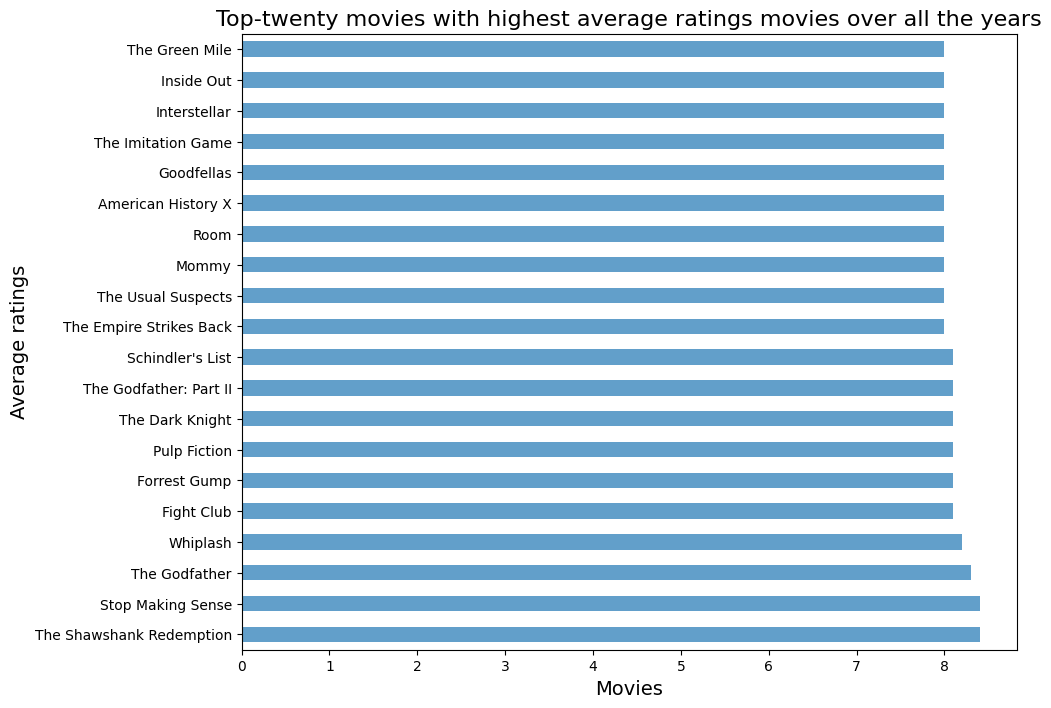

In [33]:
top_twenty_average_ratings_movies.plot(kind='barh',alpha =0.7,figsize=(10,8))
plt.title('Top-twenty movies with highest average ratings movies over all the years', fontsize=16)
plt.xlabel('Movies', fontsize=14)
plt.ylabel('Average ratings', fontsize=14);

**It is aboviously that both The Shawshank Redemption and Stop Making Sense movies have the top average ratings of movies over all the years**

**But let's explore the total count of voting to get which movie has the highest count of voting for movies over all the years**
          

In [34]:
# using groupby and sort_value methods to extract the vote counts of movies as follows:
vote_count_movies = df.groupby('original_title').vote_count.max().sort_values(ascending=False)
vote_count_movies

original_title
Inception            9767
The Avengers         8903
Avatar               8458
The Dark Knight      8432
Django Unchained     7375
                     ... 
Gracie                 10
Mrs. Winterbourne      10
Maurice Richard        10
Julia                  10
Black Nativity         10
Name: vote_count, Length: 3455, dtype: int64

In [35]:
# Slicing the vote count of movies to get the top twenty voting count of movies over all the years as follows:
top_twenty_vote_count_movies = vote_count_movies[:20]
top_twenty_vote_count_movies

original_title
Inception                                            9767
The Avengers                                         8903
Avatar                                               8458
The Dark Knight                                      8432
Django Unchained                                     7375
The Hunger Games                                     7080
Iron Man 3                                           6882
The Dark Knight Rises                                6723
Interstellar                                         6498
The Hobbit: An Unexpected Journey                    6417
The Matrix                                           6351
Iron Man                                             6220
Mad Max: Fury Road                                   6185
Skyfall                                              6137
The Lord of the Rings: The Fellowship of the Ring    6079
Fight Club                                           5923
The Shawshank Redemption                             5754

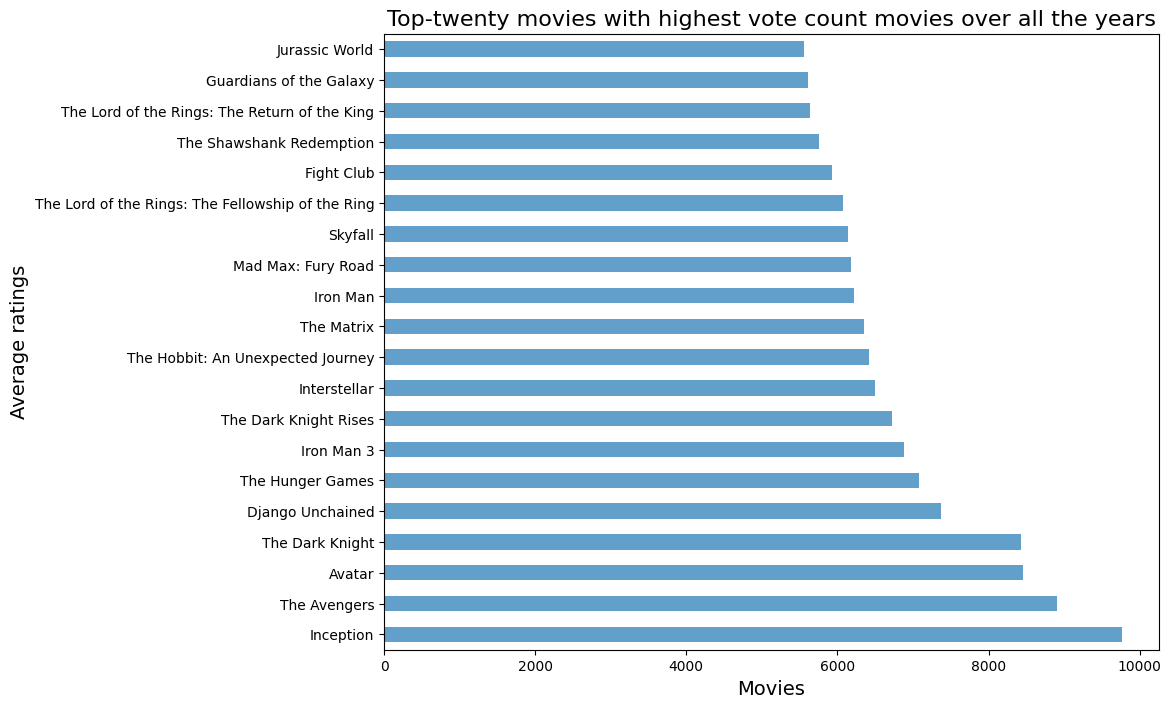

In [36]:
# Visualization of top-twenty movies with highest vote count movies over all the years
top_twenty_vote_count_movies.plot(kind='barh',alpha =0.7,figsize=(10,8))
plt.title('Top-twenty movies with highest vote count movies over all the years', fontsize=16)
plt.xlabel('Movies', fontsize=14)
plt.ylabel('Average ratings', fontsize=14);

**It is obviously that "Inception" movie has the highest vote count (9767) of movies over all the years while "The Shawshank Redemption" movie (which is the highest average ratings) has roughly half vote counts of the "Inception" movie (5754)**

In [37]:
# Let's get the data row concerning the "inception" movie which can be gotten by query method
df.query('original_title == "Inception"')

popularity     budget    revenue     profit  ratio_profit_to_budget  \
1919    9.363643  160000000  825500000  665500000                4.159375   

     original_title  runtime  \
1919      Inception      148   

                                                 genres  vote_count  \
1919  Action|Thriller|Science Fiction|Mystery|Adventure        9767   

      vote_average  release_year  
1919           7.9          2010

**The average rating of "Inception" movie is (7.9) which has roughly twice vote count of the "The Shawshank Redemption" which has an average rating of "8.4"**

**As known that as the vote count increases, the average rating decreases. So, the ratings can be fairly comparible if they have the same vote count**

### Question 3: Which movie has the most profitable one over all the years?

**The most profitable movies over all the years can be extracted and sorted in descending order as follows**

In [38]:
# profitable movies can be extracted using groupby and sort_value methods
profit_of_movies = df.groupby(['original_title','release_year']).profit.max().sort_values(ascending=False)
profit_of_movies

original_title                release_year
Avatar                        2009            2544505847
Star Wars: The Force Awakens  2015            1868178225
Titanic                       1997            1645034188
Jurassic World                2015            1363528810
Furious 7                     2015            1316249360
                                                 ...    
The 13th Warrior              1999             -98301101
Mars Needs Moms               2011            -111007242
The Alamo                     2004            -119180039
The Lone Ranger               2013            -165710090
The Warrior's Way             2010            -413912431
Name: profit, Length: 3492, dtype: int64

In [39]:
# Top twenty profitable movies can be extracted by slicing as follows:
top_twenty_profitable_movies = profit_of_movies[:20]/(10**9)
top_twenty_profitable_movies

original_title                                 release_year
Avatar                                         2009            2.544506
Star Wars: The Force Awakens                   2015            1.868178
Titanic                                        1997            1.645034
Jurassic World                                 2015            1.363529
Furious 7                                      2015            1.316249
The Avengers                                   2012            1.299558
Harry Potter and the Deathly Hallows: Part 2   2011            1.202818
Avengers: Age of Ultron                        2015            1.125036
Frozen                                         2013            1.124219
The Net                                        1995            1.084280
Minions                                        2015            1.082731
The Lord of the Rings: The Return of the King  2003            1.024889
Iron Man 3                                     2013            1.015440
Tran

*Let's visualize the top twenty profitable movies over all the years*

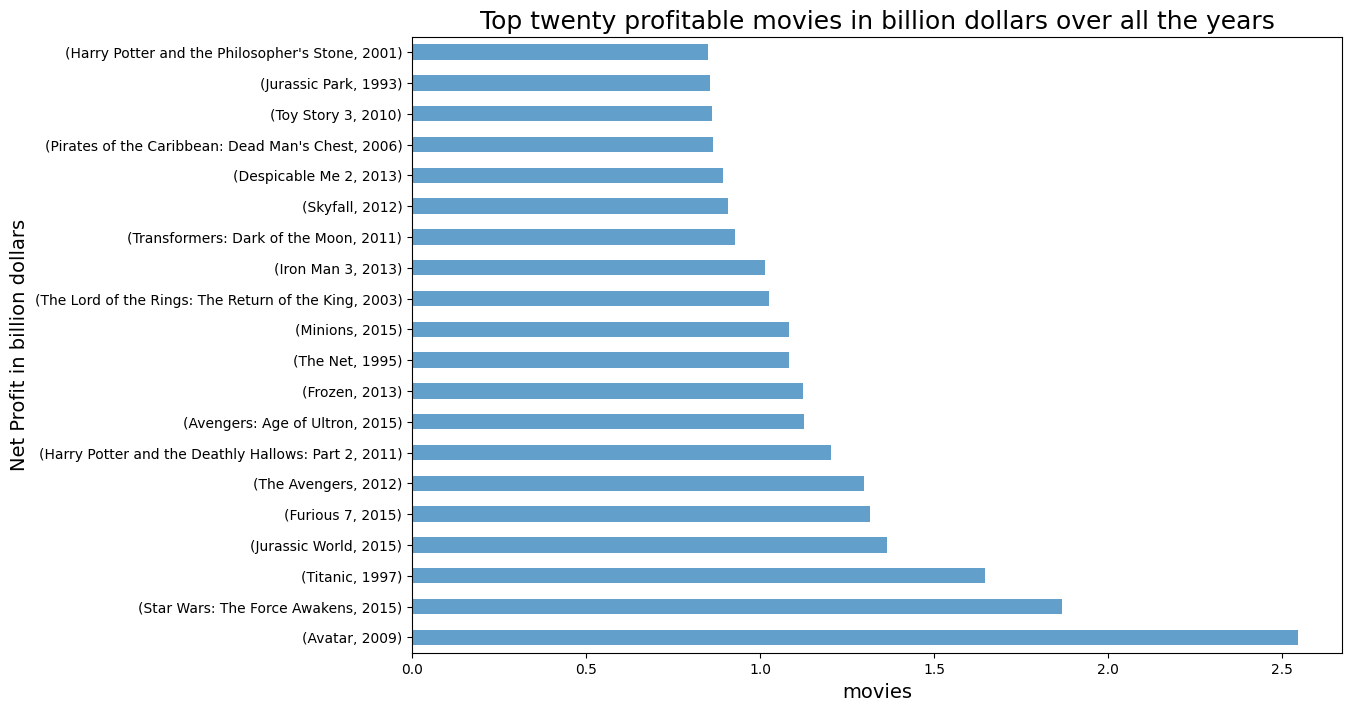

In [40]:
# Visualization of top twenty profitable movies in billion dollars over all the years 
top_twenty_profitable_movies.plot(kind='barh',alpha =0.7,figsize=(12,8))
plt.title('Top twenty profitable movies in billion dollars over all the years', fontsize=18)
plt.xlabel('movies',fontsize=14)
plt.ylabel('Net Profit in billion dollars',fontsize=14);

**It is obviously that the most profitable movie over all the years is "Avatar" movie that released in 2009**

**Let's explore the profitability of movies over all the years by another way using the ratio between profit to budget funds**

In [41]:
# profit ratios to budget for movies over all the years can be extracted using groupby and sort_value methods
ratio_profit_to_budget_of_movies = df.groupby(['original_title','release_year']).ratio_profit_to_budget.max().sort_values(ascending=False)
ratio_profit_to_budget_of_movies

original_title                 release_year
Rocky                          1976            105.577406
The Rocky Horror Picture Show  1975             93.076932
Saw                            2004             85.593058
E.T. the Extra-Terrestrial     1982             74.515291
My Big Fat Greek Wedding       2002             72.748809
                                                  ...    
Pirates                        1986             -0.958954
Third Person                   2013             -0.963522
Valmont                        1989             -0.965694
The Warrior's Way              2010             -0.973912
Lolita                         1997             -0.982902
Name: ratio_profit_to_budget, Length: 3492, dtype: float64

In [42]:
# Top twenty profit to budget ratios for movies over all the years can be extracted by slicing as follows:
top_twenty_ratios_profitable_movies = ratio_profit_to_budget_of_movies[:20]
top_twenty_ratios_profitable_movies

original_title                  release_year
Rocky                           1976            105.577406
The Rocky Horror Picture Show   1975             93.076932
Saw                             2004             85.593058
E.T. the Extra-Terrestrial      1982             74.515291
My Big Fat Greek Wedding        2002             72.748809
The Full Monty                  1997             72.671463
Star Wars                       1977             69.490728
Saturday Night Fever            1977             66.746624
Jaws                            1975             66.236286
Crocodile Dundee                1986             64.640701
Insidious                       2010             63.672767
Love Story                      1970             61.000000
The Rescuers                    1977             58.346558
Paranormal Activity 2           2010             58.170677
Vanishing Point                 1971             54.589466
The Exorcist                    1973             54.163268
Dr. No     

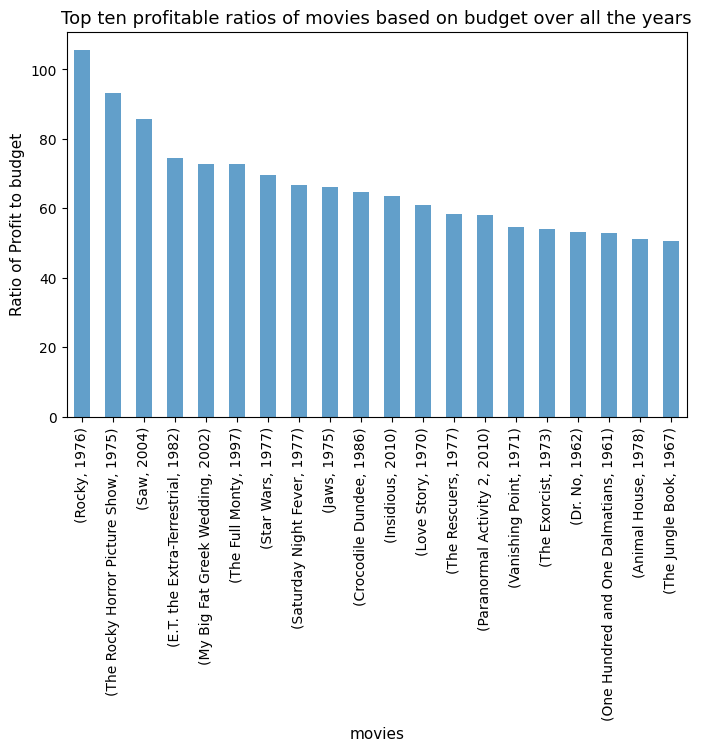

In [43]:
# Visualization of top ten profitable ratios of movies based on budget over all the years
top_twenty_ratios_profitable_movies.plot(kind='bar',alpha =0.7,figsize=(8,5))
plt.title('Top ten profitable ratios of movies based on budget over all the years', fontsize=13)
plt.xlabel('movies',fontsize=11)
plt.ylabel('Ratio of Profit to budget',fontsize=11);

**It is obviosly that "Rocky" movie which released in 1976 has the highest ratio of profits to its corresponding budgets**

### Question 4: What are the characteristics of the most runtime movies over all the years?

**Let's explore the statistics related to the most runtime movies which is above the mean value of runtime** 

In [44]:
# First,let's filter the dataframe using query method and then sorting it in descending order
most_runtimes_movies = df.query('runtime > runtime.mean()').sort_values('runtime',ascending=False)
most_runtimes_movies

popularity    budget    revenue    profit  ratio_profit_to_budget  \
10443    0.804533  31115000   57750000  26635000                0.856018   
7332     0.418950  44000000    3484331 -40515669               -0.920811   
9850     1.168767  15000000   70000000  55000000                3.666667   
5065     0.469518  56000000   12923936 -43076064               -0.769215   
3110     0.389554   8376800   13000000   4623200                0.551905   
...           ...       ...        ...       ...                     ...   
131      1.278928  20000000   43967255  23967255                1.198363   
7653     0.291333  10000000   21786738  11786738                1.178674   
2914     1.475988  30000000  105173115  75173115                2.505771   
1508     0.710966  12000000    1644755 -10355245               -0.862937   
4493     0.714232  17000000   73244881  56244881                3.308522   

                  original_title  runtime  \
10443                  Cleopatra      248   
7332               Heaven's Gate      219   
9850          Lawrence of Arabia      216   
5065           Gods and Generals      214   
3110                Jodhaa Akbar      213   
...                          ...      ...   
131                          Max      111   
7653         My Blueberry Nights      111   
2914   Forgetting Sarah Marshall      111   
1508                      Ondine      111   
4493           To Rome with Love      111   

                                       genres  vote_count  vote_average  \
10443                   Drama|History|Romance          68           6.3   
7332             Action|Drama|History|Western          18           6.0   
9850              Adventure|Drama|History|War         517           7.5   
5065                        Drama|History|War          23           5.8   
3110   Action|Adventure|Drama|Foreign|History          48           7.8   
...                                       ...         ...           ...   
131                    Adventure|Drama|Family         214           7.0   
7653                            Drama|Romance         110           6.2   
2914                     Comedy|Romance|Drama         750           6.3   
1508                            Drama|Romance          36           6.2   
4493                           Romance|Comedy         298           5.5   

       release_year  
10443          1963  
7332           1980  
9850           1962  
5065           2003  
3110           2008  
...             ...  
131            2015  
7653           2007  
2914           2008  
1508           2009  
4493           2012  

[1447 rows x 11 columns]

In [45]:
# Printing the statistics of the most runtime movies
most_runtimes_movies.describe()

popularity        budget       revenue        profit  \
count  1447.000000  1.447000e+03  1.447000e+03  1.447000e+03   
mean      1.577046  5.042675e+07  1.587616e+08  1.083349e+08   
std       2.056298  4.971320e+07  2.303485e+08  1.995647e+08   
min       0.010335  1.100000e+06  1.021398e+06 -1.657101e+08   
25%       0.559641  1.600000e+07  2.945323e+07  3.627331e+06   
50%       0.981049  3.500000e+07  7.627045e+07  3.909619e+07   
75%       1.834010  6.750000e+07  1.876604e+08  1.302275e+08   
max      32.985763  3.800000e+08  2.781506e+09  2.544506e+09   

       ratio_profit_to_budget      runtime   vote_count  vote_average  \
count             1447.000000  1447.000000  1447.000000   1447.000000   
mean                 3.030601   128.113338   802.892191      6.508362   
std                  6.662460    17.019747  1197.769778      0.690124   
min                 -0.982902   111.000000    10.000000      3.800000   
25%                  0.146819   116.000000   112.000000      6.000000   
50%                  1.332941   123.000000   317.000000      6.500000   
75%                  3.285838   134.000000   963.000000      7.000000   
max                105.577406   248.000000  9767.000000      8.400000   

       release_year  
count   1447.000000  
mean    2000.015895  
std       12.550772  
min     1960.000000  
25%     1994.000000  
50%     2003.000000  
75%     2010.000000  
max     2015.000000

In [46]:
# Let's compute the pairwise correlation of columns to get the strength of correlation between each two parameters.
df.corr()

C:\Users\FreeComp\AppData\Local\Temp\ipykernel_8172\1504468962.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


popularity    budget   revenue    profit  \
popularity                1.000000  0.429518  0.606023  0.588461   
budget                    0.429518  1.000000  0.678144  0.515875   
revenue                   0.606023  0.678144  1.000000  0.979425   
profit                    0.588461  0.515875  0.979425  1.000000   
ratio_profit_to_budget    0.164456 -0.137507  0.248491  0.327411   
runtime                   0.207916  0.244270  0.242646  0.215763   
vote_count                0.774795  0.544099  0.748512  0.723089   
vote_average              0.327376  0.013543  0.231272  0.265861   
release_year              0.192964  0.295302  0.157240  0.102196   

                        ratio_profit_to_budget   runtime  vote_count  \
popularity                            0.164456  0.207916    0.774795   
budget                               -0.137507  0.244270    0.544099   
revenue                               0.248491  0.242646    0.748512   
profit                                0.327411  0.215763    0.723089   
ratio_profit_to_budget                1.000000  0.003046    0.169481   
runtime                               0.003046  1.000000    0.271829   
vote_count                            0.169481  0.271829    1.000000   
vote_average                          0.221123  0.380172    0.400218   
release_year                         -0.236402 -0.127199    0.228238   

                        vote_average  release_year  
popularity                  0.327376      0.192964  
budget                      0.013543      0.295302  
revenue                     0.231272      0.157240  
profit                      0.265861      0.102196  
ratio_profit_to_budget      0.221123     -0.236402  
runtime                     0.380172     -0.127199  
vote_count                  0.400218      0.228238  
vote_average                1.000000     -0.123139  
release_year               -0.123139      1.000000

**Let's use the scatter plots to get the correlation nature between the runtime (depependant variable) and other independent variables. Then, drawing the conclusion of the most related variable/parameter to the "runtime" parameter.**

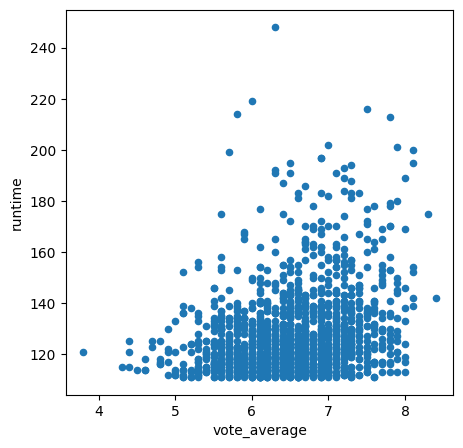

In [47]:
# visualize a scatter plot between average rating and runtime
most_runtimes_movies.plot(x='vote_average', y='runtime',kind='scatter',figsize=(5,5));

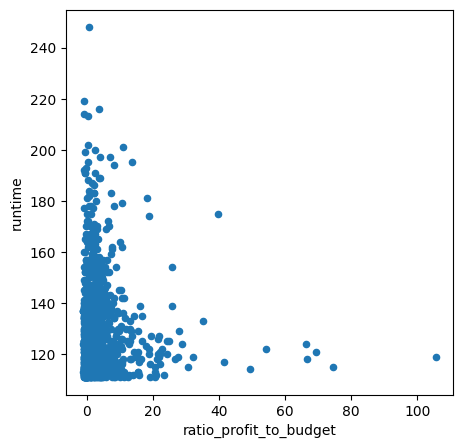

In [48]:
# visualize a scatter plot between ratio of profit to budget and runtime
most_runtimes_movies.plot(x='ratio_profit_to_budget', y='runtime',kind='scatter',figsize=(5,5));

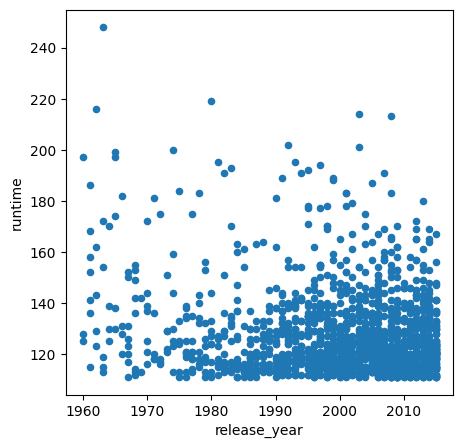

In [49]:
# visualize a scatter plot between release year and runtime
most_runtimes_movies.plot(x='release_year', y='runtime',kind='scatter',figsize=(5,5));

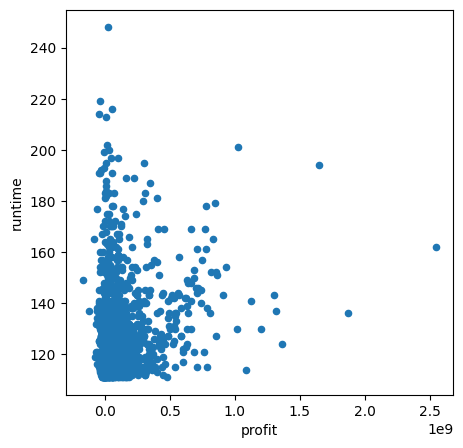

In [50]:
# visualize a scatter plot between profit and runtime
most_runtimes_movies.plot(x='profit', y='runtime',kind='scatter',figsize=(5,5));

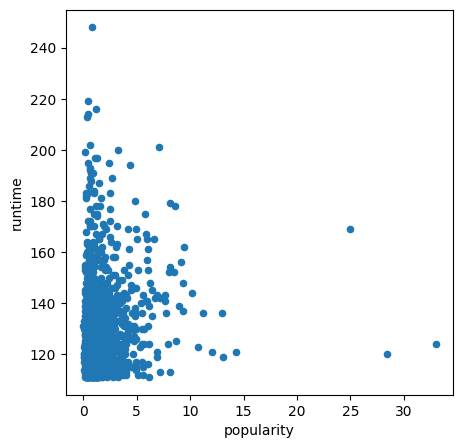

In [51]:
# visualize a scatter plot between popularity and runtime
most_runtimes_movies.plot(x='popularity', y='runtime',kind='scatter',figsize=(5,5));

### The characterstics of top ten runtimes over all the years are as follows:

**After reviwing the statistical computations, pairwise correlation of columns and scatter plots between runtime and other parameters of the dataframe, the following is concluded :**

1- The strongest correlation of runtime with other parameters is with average ratings (vote_average).

2- There is a negative correlation between runtime and release year meaning that the earlier movies is more runtimed than the recent ones.

### The conclusion of the characterstics of the most runtime movies:

#### It can be concluded that the longer runtime, the higher average rating is.


### Question 5: What are the characteristics associated with the movies with highest profits over all the years?

**Let's explore the statistics related to the the movies with highest profits which is above the mean value of profit** 

In [52]:
# First,let's filter the dataframe using query method and then sorting it in descending order
most_profitable_movies = df.query('profit > profit.mean()').sort_values('profit',ascending=False)
most_profitable_movies

popularity     budget     revenue      profit  ratio_profit_to_budget  \
1386     9.432768  237000000  2781505847  2544505847               10.736312   
3       11.173104  200000000  2068178225  1868178225                9.340891   
5231     4.355219  200000000  1845034188  1645034188                8.225171   
0       32.985763  150000000  1513528810  1363528810                9.090192   
4        9.335014  190000000  1506249360  1316249360                6.927628   
...           ...        ...         ...         ...                     ...   
3473     1.013101   75000000   152930623    77930623                1.039075   
10653    0.467344   12000000    89800000    77800000                6.483333   
8323     0.309976   60000000   137783840    77783840                1.296397   
3927     1.839408    5000000    82719885    77719885               15.543977   
3436     1.241191   50200000   127869379    77669379                1.547199   

                     original_title  runtime  \
1386                         Avatar      162   
3      Star Wars: The Force Awakens      136   
5231                        Titanic      194   
0                    Jurassic World      124   
4                         Furious 7      137   
...                             ...      ...   
3473                    Tower Heist      104   
10653                        Patton      172   
8323                   Far and Away      140   
3927               28 Days Later...      113   
3436          The Adjustment Bureau      106   

                                          genres  vote_count  vote_average  \
1386    Action|Adventure|Fantasy|Science Fiction        8458           7.1   
3       Action|Adventure|Science Fiction|Fantasy        5292           7.5   
5231                      Drama|Romance|Thriller        4654           7.3   
0      Action|Adventure|Science Fiction|Thriller        5562           6.5   
4                          Action|Crime|Thriller        2947           7.3   
...                                          ...         ...           ...   
3473                               Action|Comedy         588           5.8   
10653                          Drama|History|War         188           6.9   
8323             Adventure|Drama|Romance|Western         153           6.2   
3927             Horror|Thriller|Science Fiction        1015           6.9   
3436                    Thriller|Romance|Fantasy        1097           6.4   

       release_year  
1386           2009  
3              2015  
5231           1997  
0              2015  
4              2015  
...             ...  
3473           2011  
10653          1970  
8323           1992  
3927           2002  
3436           2011  

[989 rows x 11 columns]

In [53]:
# Printing the statistics of the most runtime movies
characterstics_of_most_profitable_movies =  most_profitable_movies.describe()
characterstics_of_most_profitable_movies

popularity        budget       revenue        profit  \
count  989.000000  9.890000e+02  9.890000e+02  9.890000e+02   
mean     2.267669  6.910000e+07  3.096021e+08  2.405021e+08   
std      2.308401  5.624186e+07  2.497514e+08  2.167216e+08   
min      0.131526  1.100000e+06  8.160000e+07  7.766938e+07   
25%      1.087383  2.600000e+07  1.555453e+08  1.106022e+08   
50%      1.659355  5.250000e+07  2.259910e+08  1.603507e+08   
75%      2.668692  9.800000e+07  3.627443e+08  2.788403e+08   
max     32.985763  3.800000e+08  2.781506e+09  2.544506e+09   

       ratio_profit_to_budget     runtime   vote_count  vote_average  \
count              989.000000  989.000000   989.000000    989.000000   
mean                 6.755039  115.278059  1309.991911      6.447422   
std                 10.528972   21.184139  1325.935741      0.700785   
min                  0.448449   72.000000    14.000000      4.400000   
25%                  2.078989   99.000000   423.000000      6.000000   
50%                  3.482874  113.000000   834.000000      6.400000   
75%                  6.590340  128.000000  1706.000000      7.000000   
max                105.577406  201.000000  9767.000000      8.300000   

       release_year  
count    989.000000  
mean    2002.704752  
std       10.362449  
min     1961.000000  
25%     1997.000000  
50%     2005.000000  
75%     2011.000000  
max     2015.000000

In [54]:
# let's extract the pairwise correlation of profit column with other columns from the pairwise correlation between columns
# which described in the previous question.
df.corr().profit

C:\Users\FreeComp\AppData\Local\Temp\ipykernel_8172\788619814.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().profit


popularity                0.588461
budget                    0.515875
revenue                   0.979425
profit                    1.000000
ratio_profit_to_budget    0.327411
runtime                   0.215763
vote_count                0.723089
vote_average              0.265861
release_year              0.102196
Name: profit, dtype: float64

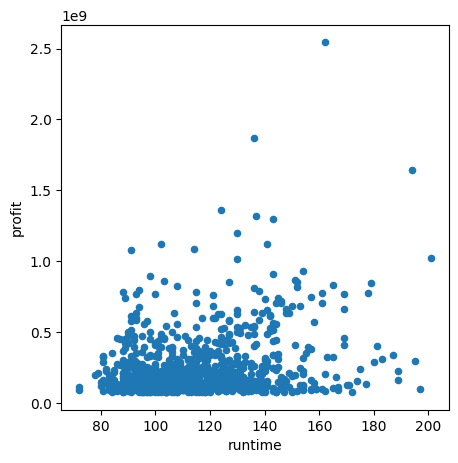

In [55]:
# visualize a scatter plot between profit and runtime
most_profitable_movies.plot(x='runtime',y='profit',kind='scatter',figsize=(5,5));

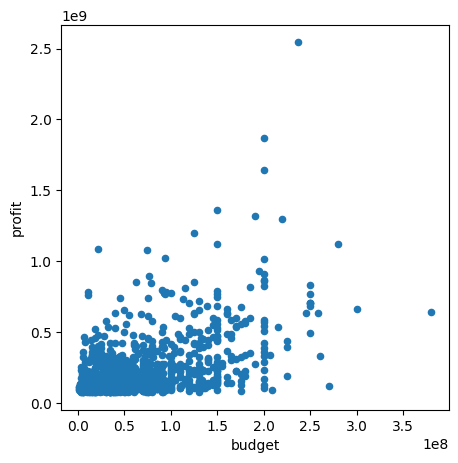

In [56]:
# visualize a scatter plot between profit and budget
most_profitable_movies.plot(x='budget',y='profit',kind='scatter',figsize=(5,5));

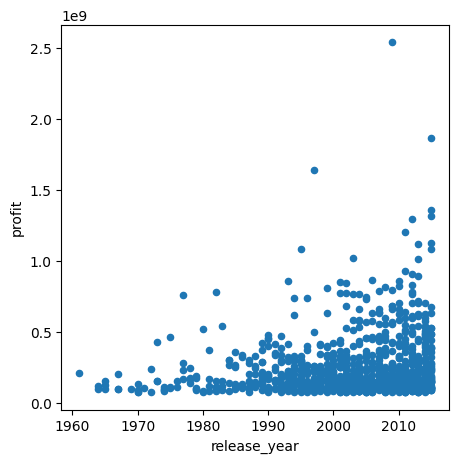

In [57]:
# visualize a scatter plot between profit and release year
most_profitable_movies.plot(x='release_year',y='profit',kind='scatter',figsize=(5,5));

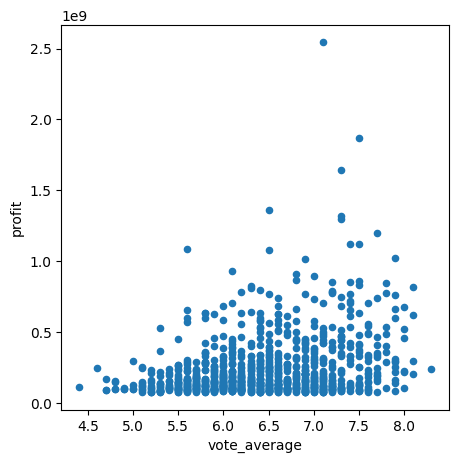

In [58]:
# visualize a scatter plot between profit and vote average
most_profitable_movies.plot(x='vote_average',y='profit',kind='scatter',figsize=(5,5));

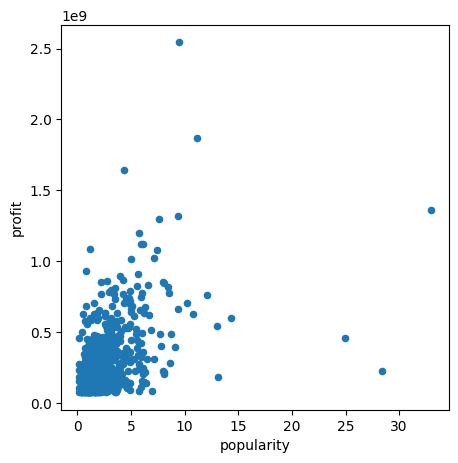

In [59]:
# visualize a scatter plot between profit and popularity
most_profitable_movies.plot(x='popularity',y='profit',kind='scatter',figsize=(5,5));

#### The characterstics of most profitable movies over all the years :

**After reviwing the statistical computations, pairwise correlation of columns and scatter plots between runtime and other parameters of the dataframe, the following is concluded :**

1- Normally the revenue is directly proportioal with the profit, so it gives no meaningful conclusion to say that there it is the strongest relationship but instead we seek for budget correlation with profit which is moderate (0.52) not strong enough or it is not enough to depend on high budgets to make high profits.

2- The correlation between high profits movies and release year is slightly positive meaning that the profits didn't depend so much on the age despite of the inflation and economical proplems. 

3- The other parameters of popularity and average raings (vote average) are positively correlated too but as a result , not a "reason", with higher correlation with vote average meaning that the higher profits of movies, the higher average ratings occurred or it is more impressive factor for audience to give higher raings.

**Let's conclude that the average ratings (vote average) is most influenced characterstic associated with the movies with higher profits**  


## Limitations of analysis :

**The analysis is limited to the following:**

* The scope of posed questions to be inspected / investigated and conclusions to be drawn from them.
* The revenue and budgets values for movies are higher than 1 million dollars and that is selected to get reasonable resullts of "ratio_profit_to_budget" which reached to 1M before selecting the minimum values of budget and revenue to start from 1M dollars which result in acceptable ratios which maximum value is (105.58)

**Note:** 

**The justification of selected the above limited minimum values is described in details above in the data cleaning part under the element of [Limitation for dataframe budget and revenue values.].**

<a id='conclusions'></a>
## Conclusions

### Evantually, the conclused results of the above analysis for "TMDB-movies" data analysis in concern with the posed questions in the introductory part are as follows:

**1- science fiction"  is the most popular genre used in movies over all the years.**

**The most used genre in movies over all the years is "Drama" which has a moderate popularity over all the movies,while the science fiction genre has already a moderate usage count over all the years (about one-third of drama's count).** 

**Note:** *The comparison between genres in popularity will be fair if the counts of genres in movies are the same. so it will be more accurate if there is a way or correlation with two variables of (average popularity) and (Counts of genres) to determine the most popular movies.*

**2-" The Shawshank Redemption" and "Stop Making Sense" movies have the top average ratings of movies over all the years.**

**"Inception" movie has the highest vote count (9767) of movies over all the years while "The Shawshank Redemption" movie (which is the highest average ratings) has roughly half vote counts of the "Inception" movie (5754)
The average rating of "Inception" movie is (7.9) which has roughly twice vote count of the "The Shawshank Redemption" which has an average rating of "8.4"

**Note :** *As known that as the vote count increases, the average rating decreases. So, the ratings can be fairly comparible if they have the same vote count. So, it is preferrable to use both factors of the average rating (vote average) and also vote count to determine the top rating movie over all the years.*

**3- The most profitable movie over all the years is "Avatar" movie that released in 2009**

**"Rocky" movie which released in 1976 has the highest ratio of profits to its corresponding budgets**

**Note :** *The most profitable movie may be determined from many point of views like: The actual profit value gained in the same release year, profit to budget ratio and the corrected value of profit at more recent year with counting the inflation value between movie's release year and this recent selected year for correction.*

*In our analysis case here, we depend on two analysis ways (actual profit value gained in the same release year and profit to budget ratio).*

**4- The characterstics of top ten runtimes over all the years are as follows:**

  * The average rating is the most correlated parameter to runtime

  *  There is a negative correlation between runtime and release year meaning that the earlier movies is more runtimed than the recent ones.

*In the same meaning, the movie watcher prefers to watch the movies with longer runtime and also is attracted slightly to the movies with the earlier release years however the number of movies run in the recent years is much higher than the earlier years.* 

**5- The characterstics associated with the movies with highest profits over all the years are as follows:**

   * the average ratings (vote average) is most influenced characterstic associated with the movies with higher profits.

   * The correlation between high profits movies and release year is slightly positive meaning that the profits didn't depend so much on the age despite of the inflation and economical proplems.

   * The other parameters of popularity and average ratings (vote average) is positively correlated too but as a result , not a "reason", with higher correlation with vote average meaning that the higher profits of movies, the higher average ratings occurred or it is more impressive factor for audience to give higher raings.